In [6]:
# import libraries we need
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/8th semester/기계학습개론/AS02/20190120_Time_8_Altitude_22_Eastward_wind.csv")
df

,Longitude (deg),Latitude (deg),Eastward wind (m/s)
0,89,231,15.634
1,89,232,18.181
2,89,233,20.451
3,89,234,22.005
4,89,235,23.681
...,...,...,...
4942,185,277,46.580
4943,185,278,47.345
4944,185,279,48.517
4945,185,280,50.392


In [7]:
# Check for missing values
print(df.isnull().sum()) 

Longitude (deg)        0
Latitude (deg)         0
Eastward wind (m/s)    0
dtype: int64


In [39]:
# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[["Longitude (deg)","Latitude (deg)"]]), columns = df.columns)

ValueError: ignored

In [38]:
scaled_df

,Longitude (deg),Latitude (deg),Eastward wind (m/s)
0,-1.714286,-1.698416,-1.126099
1,-1.714286,-1.630479,-0.960703
2,-1.714286,-1.562542,-0.813295
3,-1.714286,-1.494606,-0.712382
4,-1.714286,-1.426669,-0.603546
...,...,...,...
4942,1.714286,1.426669,0.883458
4943,1.714286,1.494606,0.933136
4944,1.714286,1.562542,1.009242
4945,1.714286,1.630479,1.131000


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df[['Longitude (deg)', 'Latitude (deg)']], 
                                                    scaled_df['Eastward wind (m/s)'], 
                                                    test_size=0.2, random_state=42)

In [15]:
# We decided to divide the dataset into train set and test set with ratio 8:2
print(f"Train dataset: {len(X_train)}")
print(f"Test dataset: {len(X_test)}")

Train dataset: 3957
Test dataset: 990


#### **1. Create an MLP-based regression model using the provided dataset and explain the regression model structure in detail.**

In [17]:
# Define n_features
n_features = 2

# Build the MLP-based regression model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

31/31 [==============================] - 0s 2ms/step
R-squared: 0.99
MSE: 0.01
MAE: 0.08


## **2. Evaluate the model performance using the given dataset.**

### **1) R-square value**

In [18]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

31/31 [==============================] - 0s 2ms/step
R-squared: 0.99
MSE: 0.01
MAE: 0.08


### **2) the actual by predicted plot**

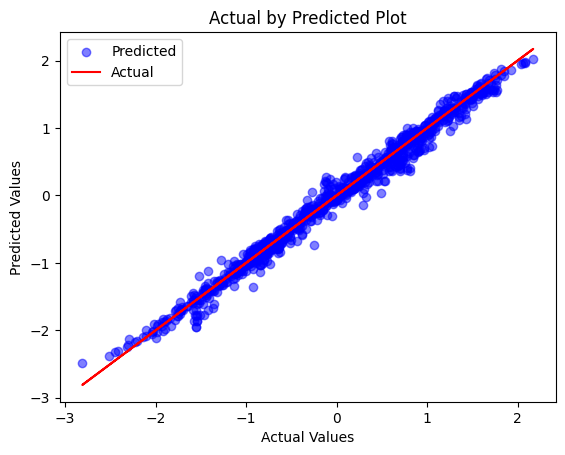

In [31]:
# Generate the actual by predicted plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='b', alpha=0.5, label='Predicted')
ax.plot(y_test, y_test, color='r', label='Actual')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Actual by Predicted Plot')
ax.legend(loc='upper left')
plt.show()

### **3) the residual by predicted plot**

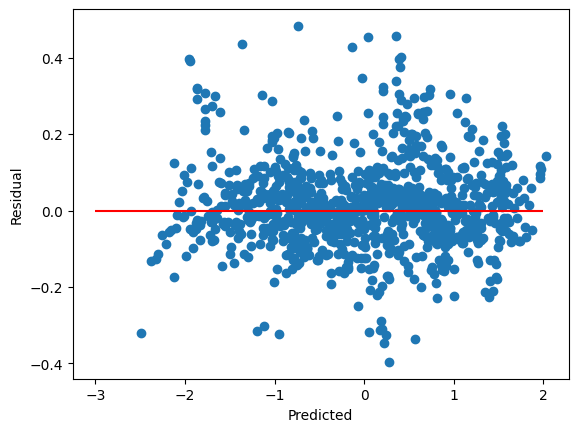

In [37]:
# Visualize the residual vs. predicted values
residuals = y_test - y_pred.flatten()
plt.scatter(y_pred.flatten(), residuals)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.hlines(0,-3,2,colors = "red")
plt.show()

### **4) The model representation error value**

In [34]:
y_pred = model.predict(X_test)
model_error = model.evaluate(X_test, y_test)

print('Model Representation Error:', model_error)

31/31 [==============================] - 0s 5ms/step - loss: 0.0135
Model Representation Error: 0.013515640050172806


### **Citation**
---